In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r"C:\Users\psiit\Downloads\SPAM text message20170820.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['Category'] = df['Category'].replace({'ham':0, 'spam':1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [8]:
df_train.shape, df_test.shape

((4179, 2), (1393, 2))

In [9]:
corpus = list(df_train['Message'].values)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(max_features=3000).fit(corpus)

In [24]:
train_x = tfidf.transform(list(df_train['Message'].values)).toarray()
test_x = tfidf.transform(list(df_test['Message'].values)).toarray()
train_y = list(df_train['Category'] * 1)
test_y = list(df_test['Category']*1)

In [25]:
x_train = np.asarray(train_x).astype(np.float32)
x_test = np.asarray(test_x).astype(np.float32)
y_train = np.asarray(train_y).astype(np.float32)
y_test = np.asarray(test_y).astype(np.float32)

In [26]:
import os
import re
import joblib
import numpy as np
import pandas as pd
import random as rn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# from clean_text import *

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Activation, Flatten, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, add, multiply, concatenate
print(tf.__version__)

import joblib
import ast

from sklearn.feature_extraction.text import TfidfVectorizer

1.13.1


In [27]:
nodes = 400
x_input = Input(shape = (x_train.shape[1],))
x = Dense(nodes, activation='relu')(x_input)
x = Dense(nodes, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)
model = Model(inputs = x_input, outputs=out)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1200400   
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 401       
Total params: 1,361,201
Trainable params: 1,361,201
Non-trainable params: 0
_________________________________________________________________


In [29]:
opt = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.00001)

cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="auto",
    patience=5,
    restore_best_weights=True 
)

In [30]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2000, batch_size=128, class_weight={0:1, 1:3}, verbose=1, callbacks=[cb])

Train on 4179 samples, validate on 1393 samples
Epoch 1/2000
4179/4179 [==============================] - 1s 284us/sample - loss: 0.6894 - acc: 0.7933 - val_loss: 0.6817 - val_acc: 0.8693
Epoch 2/2000
4179/4179 [==============================] - 1s 235us/sample - loss: 0.6846 - acc: 0.8634 - val_loss: 0.6730 - val_acc: 0.8729
Epoch 3/2000
4179/4179 [==============================] - 1s 273us/sample - loss: 0.6796 - acc: 0.8636 - val_loss: 0.6644 - val_acc: 0.8729
Epoch 4/2000
4179/4179 [==============================] - 1s 287us/sample - loss: 0.6748 - acc: 0.8636 - val_loss: 0.6553 - val_acc: 0.8729
Epoch 5/2000
4179/4179 [==============================] - 1s 263us/sample - loss: 0.6694 - acc: 0.8636 - val_loss: 0.6460 - val_acc: 0.8729
Epoch 6/2000
4179/4179 [==============================] - 1s 229us/sample - loss: 0.6638 - acc: 0.8636 - val_loss: 0.6360 - val_acc: 0.8729
Epoch 7/2000
4179/4179 [==============================] - 1s 228us/sample - loss: 0.6579 - acc: 0.8636 - val_los

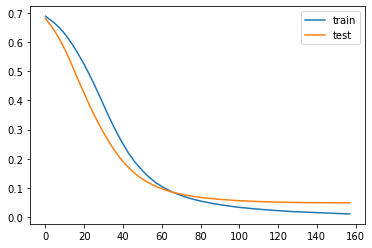

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
train_loss=model.history.history["loss"]
test_loss =model.history.history["val_loss"]

plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.show()

In [32]:
pred_prob = model.predict(x_test)
pred = (pred_prob >= 0.5)*1

In [33]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1216
           1       0.99      0.93      0.96       177

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.98      1393
weighted avg       0.99      0.99      0.99      1393



In [34]:
pred_prob_arr = []
pred_prob_temp = model.predict(x_test)
for i in np.arange(0.00, 1.00, 0.01):
    pred_temp = (pred_prob_temp >= i) * 1
    pred_prob_arr.append([i, precision_score(test_y, pred_temp), recall_score(test_y, pred_temp), f1_score(test_y, pred_temp)])

df_perf = pd.DataFrame(pred_prob_arr, columns=["cut","precision", "recall", "f1-score"])

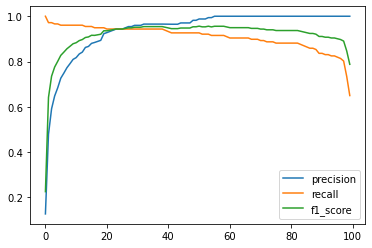

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
precision=df_perf["precision"].values
recall =df_perf["recall"].values
f1_score =df_perf["f1-score"].values

plt.plot(precision, label='precision')
plt.plot(recall, label='recall')
plt.plot(f1_score, label='f1_score')
plt.legend()
plt.show()